### Pit-stops strategy

In [1]:
#Import libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statistics import mode
import numpy as np

In [2]:
#Read csv file
pitdf = pd.read_csv(Path('CleaningData/formula1ps.csv'))
pitdf.head()

,resultId,raceId,driverId,constructorId,pitstops,number,grid,position,positionText,positionOrder,...,fastestLapSpeed,statusId,status,driverRef,constructorRef,circuitId,name,year,circuitRef,Unnamed: 26
0,23783,989,1,131,1.0,44,1,2,2,2,...,220.845,1,Finished,hamilton,mercedes,1,Australian Grand Prix,2018,albert_park,NaN
1,23804,990,1,131,1.0,44,9,3,3,3,...,207.371,1,Finished,hamilton,mercedes,3,Bahrain Grand Prix,2018,bahrain,NaN
2,23825,991,1,131,1.0,44,4,4,4,4,...,202.559,1,Finished,hamilton,mercedes,17,Chinese Grand Prix,2018,shanghai,NaN
3,23842,992,1,131,3.0,44,2,1,1,1,...,205.012,1,Finished,hamilton,mercedes,73,Azerbaijan Grand Prix,2018,BAK,NaN
4,23862,993,1,131,1.0,44,1,1,1,1,...,211.77,1,Finished,hamilton,mercedes,4,Spanish Grand Prix,2018,catalunya,NaN


In [4]:
pits_agg = pitdf.groupby(['constructorId','positionOrder','circuitId']).pitstops.agg(['sum']).reset_index().sort_values('circuitId').rename(columns = {'sum':'sumpits'})


In [5]:
pits_agg

,constructorId,positionOrder,circuitId,sumpits
435,5,18,1,0.0
612,9,3,1,1.0
425,5,15,1,3.0
1161,210,18,1,1.0
449,6,1,1,1.0
...,...,...,...,...
611,9,2,78,6.0
231,3,17,78,3.0
68,1,9,78,3.0
1063,131,20,78,1.0


Text(0, 0.5, 'sumpits')

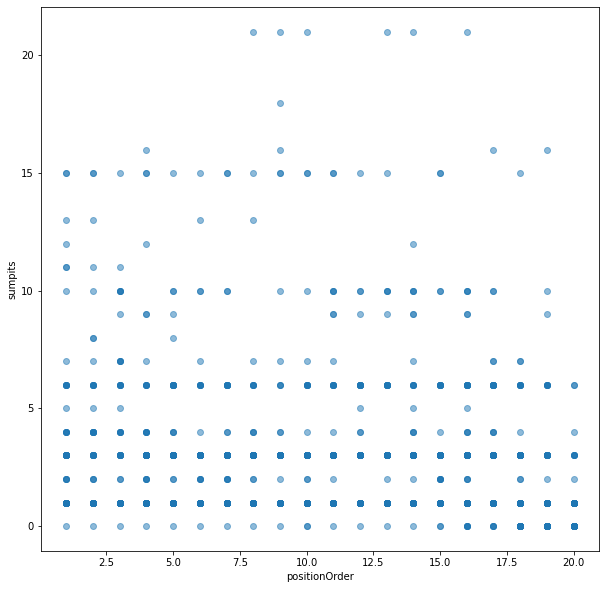

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.scatter(x=pits_agg.positionOrder, y=pits_agg.sumpits, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('sumpits')

In [7]:
df= pd.DataFrame(pits_agg)
df.to_csv('pits.csv')